## Cell 1
## Imports
Import required libraries for data analysis and visualization.


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### cell2
## Load data
Load the taxi pricing dataset and preview the first rows.


In [26]:
df = pd.read_csv("../data/taxi_trip_pricing.csv")
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


#### cell 3  
## Data overview
Inspect columns, data types, summary statistics, and missing values.


In [29]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

#### cell4
## Handle missing values
Remove rows with missing target or important feature values.


In [30]:
df_clean = df[df['Trip_Price'].notnull()]
df_clean = df_clean.dropna(subset=['Trip_Distance_km', 'Passenger_Count'])


### cell 5
## Remove outliers
Remove extreme values in distance and price to improve model performance.



In [31]:
df_clean = df_clean[df_clean['Trip_Distance_km'] < df_clean['Trip_Distance_km'].quantile(0.99)]
df_clean = df_clean[df_clean['Trip_Price'] < df_clean['Trip_Price'].quantile(0.99)]


#### cell 6
## Save cleaned data
Save the cleaned dataset for use in the machine learning model.


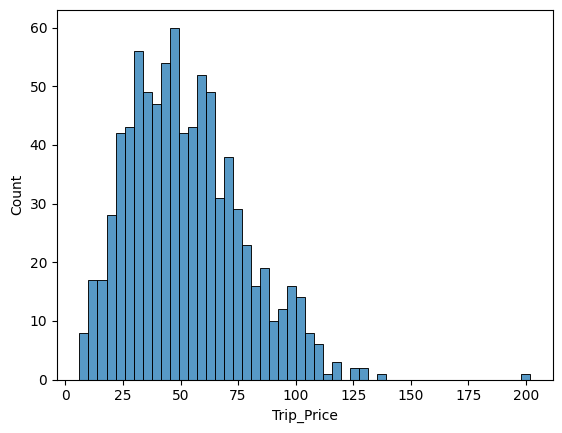

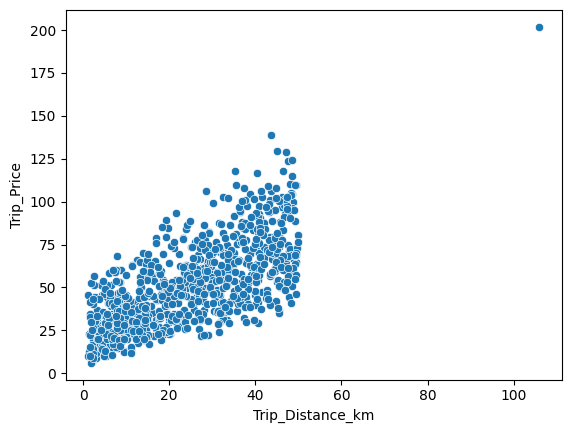

In [32]:
sns.histplot(df_clean['Trip_Price'], bins=50)
plt.show()

sns.scatterplot(x='Trip_Distance_km', y='Trip_Price', data=df_clean)
plt.show()
